In [60]:
pip install torch

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
1654.90s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/aa/3f/85b56f7e2abcfa558c5fbf7b11eb02d78a4a63e6aeee2bbae3bb552abea5/torch-2.7.0-cp311-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for sympy>=1.13.3 from https://files.pythonhosted.org/packages/a2/09/77d55d46fd61b4a135c444fc97158ef34a095e5681d0a6c10b75bf356191/sympy-1.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/b9/54/dd730b32ea14ea797530a4479b2ed46a6fb250f682a9cfb997e968bf0261/networkx-3.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for jinja2 from https://files.pythonhosted.org/packages/62/a1/3d680cbfd5f4b8f15abc1d571870c5fc3e594bb582bc3b64ea099db13e56/jinja2-3.1.6-py3-none-any.whl.metadata
  Obtaining dependency information for mpmath<1.4,>=1.1.0 from https://files.pythonhosted.org/packages/43/e3/7d92a15f894aa0c9c4b49b8ee9ac9850d6e63b03c9c32c0367a13ae62209/mpmath-1.3.0-py3-

In [2]:
pip install pandas nltk sastrawi scikit-learn wordcloud matplotlib requests

  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
  Obtaining dependency information for sastrawi from https://files.pythonhosted.org/packages/6f/4b/bab676953da3103003730b8fcdfadbdd20f333d4add10af949dd5c51e6ed/Sastrawi-1.0.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/25/92/ee1d7a00bb6b8c55755d4984fd82608603a3cc59959245068ce32e7fb808/scikit_learn-1.6.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/fa/5f/34a0c0be52dc95f96aa1197f03ad5d5c58a9901c74f050d21a3e1b21ebf9/wordcloud-1.9.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/0a/e4/300b08e3e08f9c98b0d5635f42edabf2f7a1d634e64cb0318a71a44

In [3]:
pip install datasets


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [144]:
!pip install seaborn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


zsh:1: /Users/jibrilnikki/Documents/Code/Sentimen Pemilu/bin/pip: bad interpreter: /Users/jibrilnikki/Documents/Code/notebook/bin/python: no such file or directory


In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import csv
import requests
from io import StringIO


In [2]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jibrilnikki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jibrilnikki/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
df = pd.read_csv("dataset/combined_dataset_terbaru_raw.csv")
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1774485185352122600,Sun Mar 31 23:24:25 +0000 2024,5,@Gank_Of_Petojo Total suara lebih banyak suara...,1774578528362864796,NaN,Gank_Of_Petojo,in,NaN,0,2,3,https://x.com/SuramaduJingga/status/1774578528...,749252554005983232,SuramaduJingga
1,1773824015402230156,Sun Mar 31 23:23:49 +0000 2024,2,@satriawiguna77 Mimpi ta klo pilpres minta diu...,1774578376751427775,NaN,satriawiguna77,in,young java,0,0,0,https://x.com/BudiHar73497395/status/177457837...,1504844579799187461,BudiHar73497395
2,1774578233041908194,Sun Mar 31 23:23:15 +0000 2024,0,Untuk apa Megawati ketemu dgn Prabowo pasca ke...,1774578233041908194,NaN,NaN,in,"Depok, Jawa Barat",0,0,0,https://x.com/SabaruddinS64/status/17745782330...,1716136366843822080,SabaruddinS64
3,1773615125775196316,Sun Mar 31 23:22:36 +0000 2024,0,@OposisiCerdas @Windhixxx Ini bukan kader mili...,1774578070332322025,NaN,OposisiCerdas,in,NaN,0,0,0,https://x.com/NawawiAlMaroni/status/1774578070...,1604791864585908224,NawawiAlMaroni
4,1774346930967244876,Sun Mar 31 23:18:47 +0000 2024,0,@kompascom Ngawur cuma asumsi...Jokowi tak iku...,1774577109249446306,NaN,kompascom,in,NaN,0,0,0,https://x.com/reincarnasi2/status/177457710924...,1604345001307426817,reincarnasi2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,1770844147148087554,Fri Mar 22 04:10:15 +0000 2024,0,@JamalBoegis @KPU_ID Persentase yg dihitung jg...,1771026582100140450,NaN,JamalBoegis,in,Whaat ???,0,0,0,https://x.com/abdabbad/status/1771026582100140450,389908502,abdabbad
12061,1770751205809025252,Fri Mar 22 04:08:46 +0000 2024,3,@LinizioHiraeth @5teV3n_Pe9eL intinya dr skand...,1771026206823215251,NaN,LinizioHiraeth,in,NaN,0,0,0,https://x.com/ja1nk/status/1771026206823215251,1336654517341880321,ja1nk
12062,1770943567332249730,Fri Mar 22 04:07:14 +0000 2024,0,@R19cakra @faizalassegaf Ngitung nya gak gitu ...,1771025820611653638,NaN,R19cakra,in,"Kota Surabaya, Jawa Timur",0,1,0,https://x.com/noorsyahiedd/status/177102582061...,3026646391,noorsyahiedd
12063,1770683688357089623,Fri Mar 22 04:00:11 +0000 2024,0,@KompasTV Yaudah bikin pemilu ulang gw golput ...,1771024046475686011,NaN,KompasTV,in,NaN,0,0,0,https://x.com/tukangsayu26392/status/177102404...,1686223090844614657,tukangsayu26392


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12065 entries, 0 to 12064
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      12065 non-null  int64 
 1   created_at               12065 non-null  object
 2   favorite_count           12065 non-null  int64 
 3   full_text                12065 non-null  object
 4   id_str                   12065 non-null  int64 
 5   image_url                2038 non-null   object
 6   in_reply_to_screen_name  7622 non-null   object
 7   lang                     12065 non-null  object
 8   location                 5932 non-null   object
 9   quote_count              12065 non-null  int64 
 10  reply_count              12065 non-null  int64 
 11  retweet_count            12065 non-null  int64 
 12  tweet_url                12065 non-null  object
 13  user_id_str              12065 non-null  int64 
 14  username                 12065 non-nul

In [7]:
df.describe()

,conversation_id_str,favorite_count,id_str,quote_count,reply_count,retweet_count,user_id_str
count,1.206500e+04,12065.000000,1.206500e+04,12065.000000,12065.000000,12065.000000,1.206500e+04
mean,1.771036e+18,26.355823,1.771683e+18,1.022379,2.223042,6.723249,1.004637e+18
std,2.189867e+16,539.773241,5.860454e+15,35.921806,30.434212,128.699072,6.995407e+17
min,1.855299e+17,0.000000,1.734504e+18,0.000000,0.000000,0.000000,7.366722e+06
25%,1.771270e+18,0.000000,1.771610e+18,0.000000,0.000000,0.000000,2.545014e+09
50%,1.774085e+18,0.000000,1.774320e+18,0.000000,0.000000,0.000000,1.316330e+18
75%,1.774369e+18,1.000000,1.774476e+18,0.000000,1.000000,0.000000,1.605093e+18
max,1.774587e+18,27712.000000,1.774587e+18,2433.000000,1449.000000,9055.000000,1.766416e+18


In [4]:
df = df.drop_duplicates()
df.shape

(8975, 15)

# **Preprocessing**

In [5]:
def clean_text(text):
    text = text.lower() # Ubah ke huruf kecil
    text = re.sub(r"http\S+|www\S+", '', text) # Hapus URL
    text = re.sub(r'[^\x00-\x7f]', '', text) # Hapus karakter non-ASCII
    text = re.sub(r'\n', ' ', text) # Ganti newline/enter dengan spasi
    text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation))) # Hapus tanda baca
    text = re.sub(r'\d+', '', text) #hapus angka
    return text.strip() # Hapus spasi di awal dan akhir

In [6]:
def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy", 'yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 't', 'https', 'co' 'jika', 'sehingga', 'kembali', 'dan', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'setelah', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'apakah', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharusnya', 'sebetulnya', 'setiap', 'setidaknya', 'sesuatu', 'pasti', 'saja', 'toh', 'ya', 'walau', 'tolong', 'tentu', 'amat', 'apalagi', 'bagaimanapun', 'sekali', 'jadi', 'nya'])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [7]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", 'tdk'  : 'tidak', 'yg' : 'yang', 'ga' : 'tidak','gak' : 'tidak', "anis" : 'anies', }
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [8]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
df['clean'] = df['full_text'].apply(clean_text)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
df['case'] = df['clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
df['slangword'] = df['case'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
df['tokenize'] = df['slangword'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
df['stopword'] = df['tokenize'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df['final'] = df['stopword'].apply(toSentence)

/var/folders/87/7c4rkvps35s3h1x7w31r80s40000gn/T/ipykernel_34496/3359350566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean'] = df['full_text'].apply(clean_text)
/var/folders/87/7c4rkvps35s3h1x7w31r80s40000gn/T/ipykernel_34496/3359350566.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['case'] = df['clean'].apply(casefoldingText)
/var/folders/87/7c4rkvps35s3h1x7w31r80s40000gn/T/ipykernel_34496/3359350566.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [9]:
df['full_text'].head(3)

0    @Gank_Of_Petojo Total suara lebih banyak suara...
1    @satriawiguna77 Mimpi ta klo pilpres minta diu...
2    Untuk apa Megawati ketemu dgn Prabowo pasca ke...
Name: full_text, dtype: object

In [9]:
df.drop(['reply_count','conversation_id_str','in_reply_to_screen_name','lang','quote_count','retweet_count','tweet_url','user_id_str','image_url','id_str'], axis=1, inplace=True)

/var/folders/87/7c4rkvps35s3h1x7w31r80s40000gn/T/ipykernel_34496/1035575721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['reply_count','conversation_id_str','in_reply_to_screen_name','lang','quote_count','retweet_count','tweet_url','user_id_str','image_url','id_str'], axis=1, inplace=True)


In [40]:
df.head(3)

,favorite_count,full_text,username,clean,case,slangword,tokenize,stopword,final
0,5,@Gank_Of_Petojo Total suara lebih banyak suara...,SuramaduJingga,gank of petojo total suara lebih banyak suara ...,gank of petojo total suara lebih banyak suara ...,gank of petojo total suara lebih banyak suara ...,"[gank, of, petojo, total, suara, lebih, banyak...","[gank, petojo, total, suara, suara, pilpres, d...",gank petojo total suara suara pilpres dibandin...
1,2,@satriawiguna77 Mimpi ta klo pilpres minta diu...,BudiHar73497395,satriawiguna mimpi ta klo pilpres minta diulan...,satriawiguna mimpi ta klo pilpres minta diulan...,satriawiguna mimpi ta kalau pilpres minta diul...,"[satriawiguna, mimpi, ta, kalau, pilpres, mint...","[satriawiguna, mimpi, ta, pilpres, diulang, or...",satriawiguna mimpi ta pilpres diulang orang tolol
2,0,Untuk apa Megawati ketemu dgn Prabowo pasca ke...,SabaruddinS64,untuk apa megawati ketemu dgn prabowo pasca ke...,untuk apa megawati ketemu dgn prabowo pasca ke...,untuk apa megawati ketemu dengan prabowo pasca...,"[untuk, apa, megawati, ketemu, dengan, prabowo...","[megawati, ketemu, prabowo, pasca, keputusan, ...",megawati ketemu prabowo pasca keputusan mk ter...


/var/folders/87/7c4rkvps35s3h1x7w31r80s40000gn/T/ipykernel_18941/250251809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["panjang_teks"] = df["full_text"].apply(lambda x: len(str(x)))


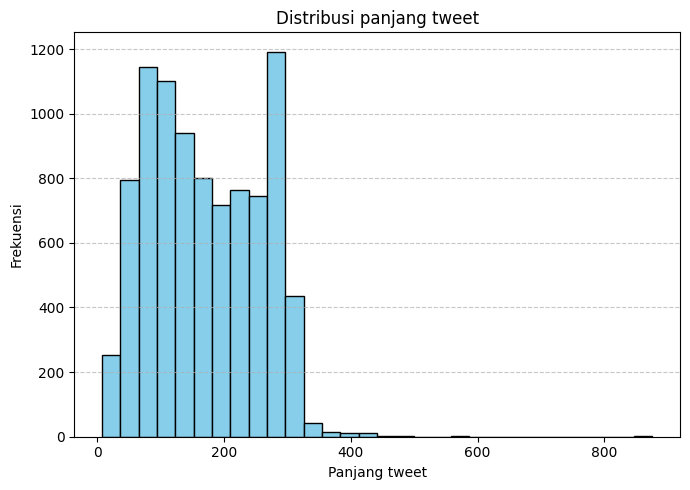

In [149]:
df["panjang_teks"] = df["full_text"].apply(lambda x: len(str(x)))

# Buat histogram
plt.figure(figsize=(7, 5))
plt.hist(df["panjang_teks"], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Panjang tweet")
plt.ylabel("Frekuensi")
plt.title("Distribusi panjang tweet")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


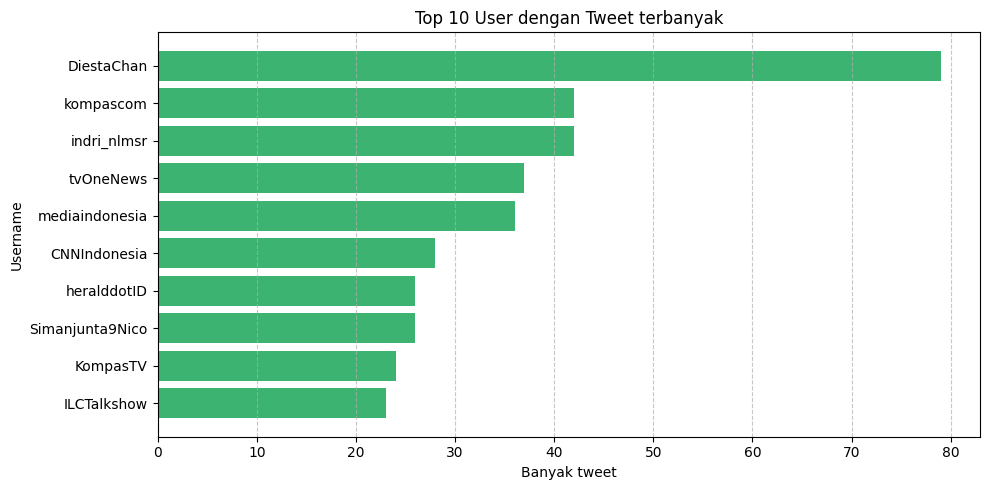

In [ ]:
top_users = df["username"].value_counts().head(10)

plt.figure(figsize=(10, 5))
plt.barh(top_users.index, top_users.values, color='mediumseagreen')
plt.xlabel("Banyak tweet")
plt.ylabel("Username")
plt.title("Top 10 User dengan Tweet terbanyak")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [155]:
df['tokenize']

0        [gank, of, petojo, total, suara, lebih, banyak...
1        [satriawiguna, mimpi, ta, kalau, pilpres, mint...
2        [untuk, apa, megawati, ketemu, dengan, prabowo...
3        [oposisicerdas, windhixxx, ini, bukan, kader, ...
4        [kompascom, berbicara, sembarangan, cuma, asum...
                               ...                        
12060    [jamalboegis, kpu, id, persentase, yang, dihit...
12061    [liniziohiraeth, tevn, peel, intinya, dr, skan...
12062    [rcakra, faizalassegaf, ngitung, nya, tidak, g...
12063    [kompastv, ya, sudah, bikin, pemilu, ulang, sa...
12064    [untung, pas, pemilihan, tadi, aku, golongan, ...
Name: tokenize, Length: 8975, dtype: object

In [10]:
filtering = [token for sublist in df['tokenize'] for token in sublist]


In [11]:
from collections import Counter

hitungfrekuensi = Counter(filtering)

In [12]:
jokowi = 0
prabowo = 0
anies = 0
ganjar = 0
for i in filtering:
  if i =='jokowi':
    jokowi+=1
  elif i == 'prabowo':
    prabowo+=1
  elif i == 'anies':
    anies+=1
  elif i == 'ganjar':
    ganjar+=1

print(jokowi,prabowo,anies,ganjar)

667 1702 1255 1186


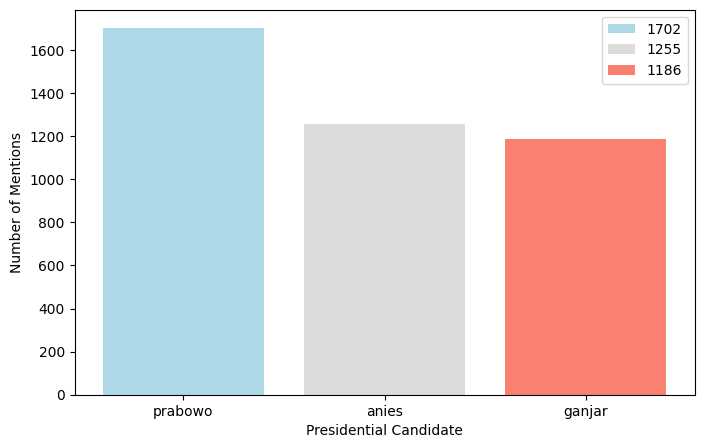

In [13]:
kandidat = ['prabowo','anies','ganjar']
freq = [prabowo,anies,ganjar]

plt.figure(figsize = (8,5))
barplot = plt.bar(kandidat,freq, color = ['lightblue','gainsboro','salmon'])
plt.legend(barplot,freq)
plt.xlabel('Presidential Candidate')
plt.ylabel('Number of Mentions')
plt.show()

# **Feature Extraction**

In [11]:
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(df['final'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

result = pd.concat([df, tfidf_df], axis=1)

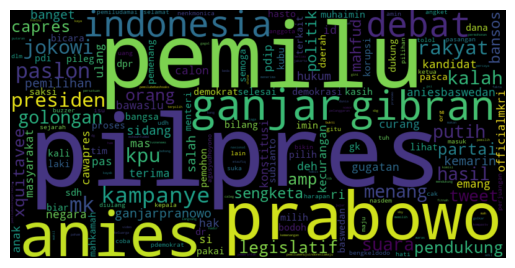

In [14]:
word_scores = tfidf_df.sum().sort_values(ascending=False)

wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_scores)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
top_keywords = tfidf_df.apply(lambda row: row.nlargest(3).index.tolist(), axis=1)
print(top_keywords)

0                       [jt, selisih, total]
1                  [satriawiguna, ta, mimpi]
2                      [oposisi, pdip, ceck]
3              [partainya, kader, windhixxx]
4              [jokowi, sembarangan, asumsi]
                        ...                 
8970    [memasukan, jamalboegis, persentase]
8971              [batal, abdelachrian, aci]
8972               [kaleee, rcakra, diitung]
8973         [februari, mencoblos, kompastv]
8974          [kenaoa, menjungkir, balikkan]
Length: 8975, dtype: object


# **Persiapan Dataset**

In [10]:
df_train = pd.read_csv("re_dataset.csv", encoding="latin1")

In [ ]:
df_train

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df_train = df_train[['Tweet', 'HS']]
df_train = df_train.dropna()
df_train['HS'] = df_train['HS'].astype(int)

In [19]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_train)
vectorizer.get_feature_names_out()
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (2, 2)>
  Coords	Values
  (0, 1)	1.0
  (1, 0)	1.0


# **Model**

In [12]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

def tokenize_function(examples):
    return tokenizer(examples["Tweet"], padding="max_length", truncation=True)

/Users/jibrilnikki/Documents/Code/Sentimen Pemilu/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
from torch.utils.data import Dataset

class HateSpeechDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])

        encoding = self.tokenizer.encode_plus(
            text,
            truncation=True,
            max_length=self.max_len,
            padding="max_length",
            return_tensors="pt"
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': label
        }

# Split data
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_train['Tweet'], df_train['HS'], test_size=0.1, stratify=df_train['HS']
)

# Buat dataset
train_dataset = HateSpeechDataset(train_texts.tolist(), train_labels.tolist(), tokenizer)
val_dataset = HateSpeechDataset(val_texts.tolist(), val_labels.tolist(), tokenizer)


In [14]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

model = AutoModelForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p1", num_labels=2)

training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_total_limit=1
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
trainer.train()

/Users/jibrilnikki/Documents/Code/Sentimen Pemilu/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
500,0.402600
1000,0.253400
1500,0.195800
2000,0.084500


/Users/jibrilnikki/Documents/Code/Sentimen Pemilu/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/jibrilnikki/Documents/Code/Sentimen Pemilu/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=2223, training_loss=0.21844838666208038, metrics={'train_runtime': 3201.3396, 'train_samples_per_second': 11.107, 'train_steps_per_second': 0.694, 'total_flos': 2338794171095040.0, 'train_loss': 0.21844838666208038, 'epoch': 3.0})

In [31]:
trainer.evaluate()

/Users/jibrilnikki/Documents/Code/Sentimen Pemilu/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


{'eval_loss': 0.41796407103538513,
 'eval_runtime': 30.4109,
 'eval_samples_per_second': 43.307,
 'eval_steps_per_second': 2.729,
 'epoch': 3.0}

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

predictions = trainer.predict(val_dataset)
predicted_labels = predictions.predictions.argmax(-1)
true_labels = val_labels.tolist() 

accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("F1-score:", f1)
print(classification_report(true_labels, predicted_labels))


Accuracy: 0.9043280182232346
F1-score: 0.9042061801926777
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       761
           1       0.89      0.88      0.89       556

    accuracy                           0.90      1317
   macro avg       0.90      0.90      0.90      1317
weighted avg       0.90      0.90      0.90      1317



In [ ]:
from transformers import AutoTokenizer

MODEL_DIR = "IndoBERT-Hate-Speech"
tokenizer.save_pretrained(MODEL_DIR)  

('IndoBERT-Hate-Speech/tokenizer_config.json',
 'IndoBERT-Hate-Speech/special_tokens_map.json',
 'IndoBERT-Hate-Speech/vocab.txt',
 'IndoBERT-Hate-Speech/added_tokens.json',
 'IndoBERT-Hate-Speech/tokenizer.json')

In [44]:
trainer.save_model(MODEL_DIR)         # simpan model
tokenizer.save_pretrained(MODEL_DIR)  # simpan tokenizer

('IndoBERT-Hate-Speech/tokenizer_config.json',
 'IndoBERT-Hate-Speech/special_tokens_map.json',
 'IndoBERT-Hate-Speech/vocab.txt',
 'IndoBERT-Hate-Speech/added_tokens.json',
 'IndoBERT-Hate-Speech/tokenizer.json')

In [27]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

model = AutoModelForSequenceClassification.from_pretrained("IndoBERT-Hate-Speech")
tokenizer = AutoTokenizer.from_pretrained("IndoBERT-Hate-Speech") 

In [28]:
from transformers import pipeline
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

Device set to use mps:0


In [31]:
text = "disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !"

label_map = {
    "LABEL_0": "Not_Hate",
    "LABEL_1": "Abusive",
    "LABEL_2": "Hate_Speech"
}

result = classifier(text)[0]
label = label_map[result['label']]  
score = result['score']

print(f"Teks: {text}")
print(f"Prediksi: {label} (Confidence: {score:.2f})")


Teks: disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !
Prediksi: Abusive (Confidence: 1.00)


In [29]:
def get_prediction(text):
    result = classifier(text)[0]
    label = label_map.get(result['label'], result['label']) 
    score = result['score']
    return label, score

In [32]:
df[['Prediksi_HS', 'Persentase']] = df['final'].apply(lambda x: pd.Series(get_prediction(x)))

print(df)

                           created_at  favorite_count  \
0      Sun Mar 31 23:24:25 +0000 2024               5   
1      Sun Mar 31 23:23:49 +0000 2024               2   
2      Sun Mar 31 23:23:15 +0000 2024               0   
3      Sun Mar 31 23:22:36 +0000 2024               0   
4      Sun Mar 31 23:18:47 +0000 2024               0   
...                               ...             ...   
12060  Fri Mar 22 04:10:15 +0000 2024               0   
12061  Fri Mar 22 04:08:46 +0000 2024               3   
12062  Fri Mar 22 04:07:14 +0000 2024               0   
12063  Fri Mar 22 04:00:11 +0000 2024               0   
12064  Fri Mar 22 04:00:05 +0000 2024               0   

                                               full_text  \
0      @Gank_Of_Petojo Total suara lebih banyak suara...   
1      @satriawiguna77 Mimpi ta klo pilpres minta diu...   
2      Untuk apa Megawati ketemu dgn Prabowo pasca ke...   
3      @OposisiCerdas @Windhixxx Ini bukan kader mili...   
4      @kompasc

/var/folders/87/7c4rkvps35s3h1x7w31r80s40000gn/T/ipykernel_84173/3000257328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Prediksi_HS', 'Persentase']] = df['final'].apply(lambda x: pd.Series(get_prediction(x)))
/var/folders/87/7c4rkvps35s3h1x7w31r80s40000gn/T/ipykernel_84173/3000257328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Prediksi_HS', 'Persentase']] = df['final'].apply(lambda x: pd.Series(get_prediction(x)))


In [61]:
df_hs = df[['final','Prediksi_HS', 'Persentase']]
df_hs

,final,Prediksi_HS,Persentase
0,gank petojo total suara suara pilpres dibandin...,Not_Hate,0.997985
1,satriawiguna mimpi ta pilpres diulang orang tolol,Abusive,0.997109
2,megawati ketemu prabowo pasca keputusan mk ter...,Abusive,0.997207
3,oposisicerdas windhixxx kader militan pilpres ...,Abusive,0.997457
4,kompascom berbicara sembarangan asumsi jokowi ...,Abusive,0.992173
...,...,...,...
12060,jamalboegis kpu id persentase dihitung memasuk...,Not_Hate,0.984031
12061,liniziohiraeth tevn peel intinya dr skandal ca...,Not_Hate,0.999108
12062,rcakra faizalassegaf ngitung gitu kaleee diitu...,Abusive,0.500121
12063,kompastv bikin pemilu ulang golongan putih pem...,Not_Hate,0.998960


In [ ]:
df_hs.to_csv("WRAP_Hate_speech.csv")

/Users/jibrilnikki/Documents/Code/Sentimen Pemilu


In [14]:
df_hs = pd.read_csv("WRAP_Hate_speech.csv")

In [15]:
df_hs['Prediksi_HS'] = df_hs['Prediksi_HS'].replace({"Abusive": "Hate-Speech", "Not_Hate": "Non Hate-Speech"})

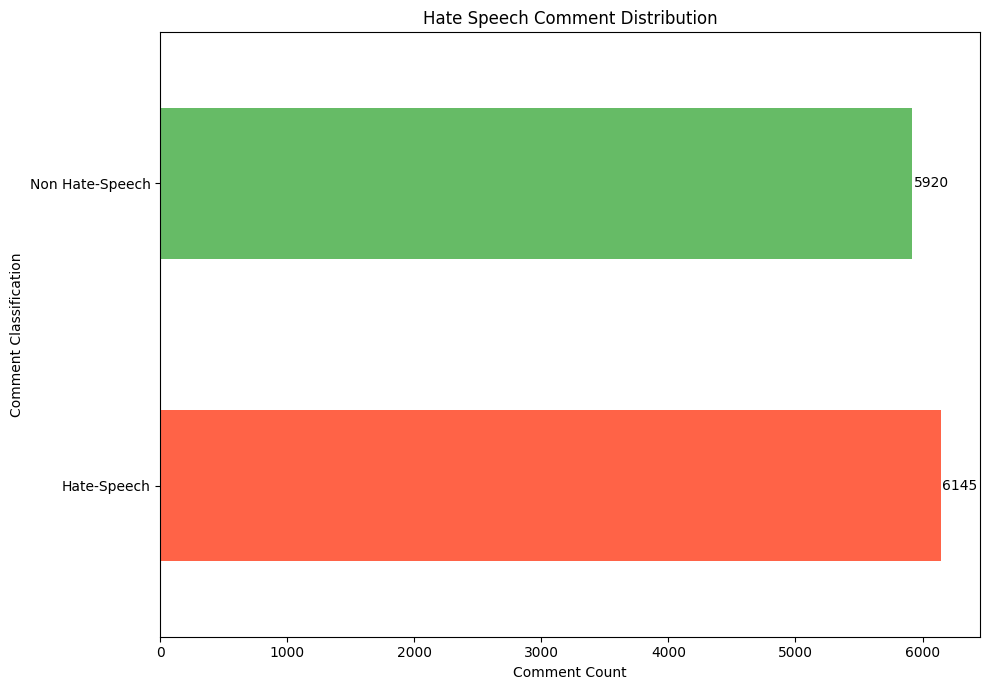

In [28]:
jml_hate = df_hs['Prediksi_HS'].value_counts()

plt.figure(figsize=(10, 7))
ax = jml_hate.plot(kind='barh', color=['Tomato', '#66BB66'])

for i, value in enumerate(jml_hate):
    plt.text(value + 10, i, str(value), va='center', fontsize=10)

plt.title('Hate Speech Comment Distribution')
plt.xlabel('Comment Count')
plt.ylabel('Comment Classification')
plt.grid(axis='x', linestyle=' ', alpha=0.7)
plt.tight_layout()
plt.show()


In [50]:
df_time = df.copy()

In [51]:
df_time['created_at'] = df_time['created_at'].str.replace(r'\t.*', '', regex=True)

df_time['created_at'] = pd.to_datetime(df_time['created_at'], format='%a %b %d %H:%M:%S %z %Y')

In [52]:
df_time

,created_at,favorite_count,full_text,location,username,clean,case,slangword,tokenize,stopword,final
0,2024-03-31 23:24:25+00:00,5,@Gank_Of_Petojo Total suara lebih banyak suara...,NaN,SuramaduJingga,gank of petojo total suara lebih banyak suara ...,gank of petojo total suara lebih banyak suara ...,gank of petojo total suara lebih banyak suara ...,"[gank, of, petojo, total, suara, lebih, banyak...","[gank, petojo, total, suara, suara, pilpres, d...",gank petojo total suara suara pilpres dibandin...
1,2024-03-31 23:23:49+00:00,2,@satriawiguna77 Mimpi ta klo pilpres minta diu...,young java,BudiHar73497395,satriawiguna mimpi ta klo pilpres minta diulan...,satriawiguna mimpi ta klo pilpres minta diulan...,satriawiguna mimpi ta kalau pilpres minta diul...,"[satriawiguna, mimpi, ta, kalau, pilpres, mint...","[satriawiguna, mimpi, ta, pilpres, diulang, or...",satriawiguna mimpi ta pilpres diulang orang tolol
2,2024-03-31 23:23:15+00:00,0,Untuk apa Megawati ketemu dgn Prabowo pasca ke...,"Depok, Jawa Barat",SabaruddinS64,untuk apa megawati ketemu dgn prabowo pasca ke...,untuk apa megawati ketemu dgn prabowo pasca ke...,untuk apa megawati ketemu dengan prabowo pasca...,"[untuk, apa, megawati, ketemu, dengan, prabowo...","[megawati, ketemu, prabowo, pasca, keputusan, ...",megawati ketemu prabowo pasca keputusan mk ter...
3,2024-03-31 23:22:36+00:00,0,@OposisiCerdas @Windhixxx Ini bukan kader mili...,NaN,NawawiAlMaroni,oposisicerdas windhixxx ini bukan kader milit...,oposisicerdas windhixxx ini bukan kader milit...,oposisicerdas windhixxx ini bukan kader milita...,"[oposisicerdas, windhixxx, ini, bukan, kader, ...","[oposisicerdas, windhixxx, kader, militan, pil...",oposisicerdas windhixxx kader militan pilpres ...
4,2024-03-31 23:18:47+00:00,0,@kompascom Ngawur cuma asumsi...Jokowi tak iku...,NaN,reincarnasi2,kompascom ngawur cuma asumsi jokowi tak ikut...,kompascom ngawur cuma asumsi jokowi tak ikut...,kompascom berbicara sembarangan cuma asumsi jo...,"[kompascom, berbicara, sembarangan, cuma, asum...","[kompascom, berbicara, sembarangan, asumsi, jo...",kompascom berbicara sembarangan asumsi jokowi ...
...,...,...,...,...,...,...,...,...,...,...,...
12060,2024-03-22 04:10:15+00:00,0,@JamalBoegis @KPU_ID Persentase yg dihitung jg...,Whaat ???,abdabbad,jamalboegis kpu id persentase yg dihitung jg ...,jamalboegis kpu id persentase yg dihitung jg ...,jamalboegis kpu id persentase yang dihitung ju...,"[jamalboegis, kpu, id, persentase, yang, dihit...","[jamalboegis, kpu, id, persentase, dihitung, m...",jamalboegis kpu id persentase dihitung memasuk...
12061,2024-03-22 04:08:46+00:00,3,@LinizioHiraeth @5teV3n_Pe9eL intinya dr skand...,NaN,ja1nk,liniziohiraeth tevn peel intinya dr skandal c...,liniziohiraeth tevn peel intinya dr skandal c...,liniziohiraeth tevn peel intinya dr skandal ca...,"[liniziohiraeth, tevn, peel, intinya, dr, skan...","[liniziohiraeth, tevn, peel, intinya, dr, skan...",liniziohiraeth tevn peel intinya dr skandal ca...
12062,2024-03-22 04:07:14+00:00,0,@R19cakra @faizalassegaf Ngitung nya gak gitu ...,"Kota Surabaya, Jawa Timur",noorsyahiedd,rcakra faizalassegaf ngitung nya gak gitu jug...,rcakra faizalassegaf ngitung nya gak gitu jug...,rcakra faizalassegaf ngitung nya tidak gitu ju...,"[rcakra, faizalassegaf, ngitung, nya, tidak, g...","[rcakra, faizalassegaf, ngitung, gitu, kaleee,...",rcakra faizalassegaf ngitung gitu kaleee diitu...
12063,2024-03-22 04:00:11+00:00,0,@KompasTV Yaudah bikin pemilu ulang gw golput ...,NaN,tukangsayu26392,kompastv yaudah bikin pemilu ulang gw golput d...,kompastv yaudah bikin pemilu ulang gw golput d...,kompastv ya sudah bikin pemilu ulang saya golo...,"[kompastv, ya, sudah, bikin, pemilu, ulang, sa...","[kompastv, bikin, pemilu, ulang, golongan, put...",kompastv bikin pemilu ulang golongan putih pem...


In [54]:
df_time[['Prediksi_HS','Persentase']] = df_hs[['Prediksi_HS', 'Persentase']]

In [55]:
df_time

,created_at,favorite_count,full_text,location,username,clean,case,slangword,tokenize,stopword,final,Prediksi_HS,Persentase
0,2024-03-31 23:24:25+00:00,5,@Gank_Of_Petojo Total suara lebih banyak suara...,NaN,SuramaduJingga,gank of petojo total suara lebih banyak suara ...,gank of petojo total suara lebih banyak suara ...,gank of petojo total suara lebih banyak suara ...,"[gank, of, petojo, total, suara, lebih, banyak...","[gank, petojo, total, suara, suara, pilpres, d...",gank petojo total suara suara pilpres dibandin...,Non Hate-Speech,0.997985
1,2024-03-31 23:23:49+00:00,2,@satriawiguna77 Mimpi ta klo pilpres minta diu...,young java,BudiHar73497395,satriawiguna mimpi ta klo pilpres minta diulan...,satriawiguna mimpi ta klo pilpres minta diulan...,satriawiguna mimpi ta kalau pilpres minta diul...,"[satriawiguna, mimpi, ta, kalau, pilpres, mint...","[satriawiguna, mimpi, ta, pilpres, diulang, or...",satriawiguna mimpi ta pilpres diulang orang tolol,Hate-Speech,0.997109
2,2024-03-31 23:23:15+00:00,0,Untuk apa Megawati ketemu dgn Prabowo pasca ke...,"Depok, Jawa Barat",SabaruddinS64,untuk apa megawati ketemu dgn prabowo pasca ke...,untuk apa megawati ketemu dgn prabowo pasca ke...,untuk apa megawati ketemu dengan prabowo pasca...,"[untuk, apa, megawati, ketemu, dengan, prabowo...","[megawati, ketemu, prabowo, pasca, keputusan, ...",megawati ketemu prabowo pasca keputusan mk ter...,Hate-Speech,0.997207
3,2024-03-31 23:22:36+00:00,0,@OposisiCerdas @Windhixxx Ini bukan kader mili...,NaN,NawawiAlMaroni,oposisicerdas windhixxx ini bukan kader milit...,oposisicerdas windhixxx ini bukan kader milit...,oposisicerdas windhixxx ini bukan kader milita...,"[oposisicerdas, windhixxx, ini, bukan, kader, ...","[oposisicerdas, windhixxx, kader, militan, pil...",oposisicerdas windhixxx kader militan pilpres ...,Hate-Speech,0.997457
4,2024-03-31 23:18:47+00:00,0,@kompascom Ngawur cuma asumsi...Jokowi tak iku...,NaN,reincarnasi2,kompascom ngawur cuma asumsi jokowi tak ikut...,kompascom ngawur cuma asumsi jokowi tak ikut...,kompascom berbicara sembarangan cuma asumsi jo...,"[kompascom, berbicara, sembarangan, cuma, asum...","[kompascom, berbicara, sembarangan, asumsi, jo...",kompascom berbicara sembarangan asumsi jokowi ...,Hate-Speech,0.992173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,2024-03-22 04:10:15+00:00,0,@JamalBoegis @KPU_ID Persentase yg dihitung jg...,Whaat ???,abdabbad,jamalboegis kpu id persentase yg dihitung jg ...,jamalboegis kpu id persentase yg dihitung jg ...,jamalboegis kpu id persentase yang dihitung ju...,"[jamalboegis, kpu, id, persentase, yang, dihit...","[jamalboegis, kpu, id, persentase, dihitung, m...",jamalboegis kpu id persentase dihitung memasuk...,Non Hate-Speech,0.984031
12061,2024-03-22 04:08:46+00:00,3,@LinizioHiraeth @5teV3n_Pe9eL intinya dr skand...,NaN,ja1nk,liniziohiraeth tevn peel intinya dr skandal c...,liniziohiraeth tevn peel intinya dr skandal c...,liniziohiraeth tevn peel intinya dr skandal ca...,"[liniziohiraeth, tevn, peel, intinya, dr, skan...","[liniziohiraeth, tevn, peel, intinya, dr, skan...",liniziohiraeth tevn peel intinya dr skandal ca...,Non Hate-Speech,0.999108
12062,2024-03-22 04:07:14+00:00,0,@R19cakra @faizalassegaf Ngitung nya gak gitu ...,"Kota Surabaya, Jawa Timur",noorsyahiedd,rcakra faizalassegaf ngitung nya gak gitu jug...,rcakra faizalassegaf ngitung nya gak gitu jug...,rcakra faizalassegaf ngitung nya tidak gitu ju...,"[rcakra, faizalassegaf, ngitung, nya, tidak, g...","[rcakra, faizalassegaf, ngitung, gitu, kaleee,...",rcakra faizalassegaf ngitung gitu kaleee diitu...,Hate-Speech,0.500121
12063,2024-03-22 04:00:11+00:00,0,@KompasTV Yaudah bikin pemilu ulang gw golput ...,NaN,tukangsayu26392,kompastv yaudah bikin pemilu ulang gw golput d...,kompastv yaudah bikin pemilu ulang gw golput d...,kompastv ya sudah bikin pemilu ulang saya golo...,"[kompastv, ya, sudah, bikin, pemilu, ulang, sa...","[kompastv, bikin, pemilu, ulang, golongan, put...",kompastv bikin pemilu ula

In [59]:
df_time['Prediksi_HS'] = df_time['Prediksi_HS'].replace({'Non Hate-Speech':'Not Hate'})

In [60]:
df_time

,created_at,favorite_count,full_text,location,username,clean,case,slangword,tokenize,stopword,final,Prediksi_HS,Persentase,month
0,2024-03-31 23:24:25+00:00,5,@Gank_Of_Petojo Total suara lebih banyak suara...,NaN,SuramaduJingga,gank of petojo total suara lebih banyak suara ...,gank of petojo total suara lebih banyak suara ...,gank of petojo total suara lebih banyak suara ...,"[gank, of, petojo, total, suara, lebih, banyak...","[gank, petojo, total, suara, suara, pilpres, d...",gank petojo total suara suara pilpres dibandin...,Not Hate,0.997985,2024-03
1,2024-03-31 23:23:49+00:00,2,@satriawiguna77 Mimpi ta klo pilpres minta diu...,young java,BudiHar73497395,satriawiguna mimpi ta klo pilpres minta diulan...,satriawiguna mimpi ta klo pilpres minta diulan...,satriawiguna mimpi ta kalau pilpres minta diul...,"[satriawiguna, mimpi, ta, kalau, pilpres, mint...","[satriawiguna, mimpi, ta, pilpres, diulang, or...",satriawiguna mimpi ta pilpres diulang orang tolol,Hate-Speech,0.997109,2024-03
2,2024-03-31 23:23:15+00:00,0,Untuk apa Megawati ketemu dgn Prabowo pasca ke...,"Depok, Jawa Barat",SabaruddinS64,untuk apa megawati ketemu dgn prabowo pasca ke...,untuk apa megawati ketemu dgn prabowo pasca ke...,untuk apa megawati ketemu dengan prabowo pasca...,"[untuk, apa, megawati, ketemu, dengan, prabowo...","[megawati, ketemu, prabowo, pasca, keputusan, ...",megawati ketemu prabowo pasca keputusan mk ter...,Hate-Speech,0.997207,2024-03
3,2024-03-31 23:22:36+00:00,0,@OposisiCerdas @Windhixxx Ini bukan kader mili...,NaN,NawawiAlMaroni,oposisicerdas windhixxx ini bukan kader milit...,oposisicerdas windhixxx ini bukan kader milit...,oposisicerdas windhixxx ini bukan kader milita...,"[oposisicerdas, windhixxx, ini, bukan, kader, ...","[oposisicerdas, windhixxx, kader, militan, pil...",oposisicerdas windhixxx kader militan pilpres ...,Hate-Speech,0.997457,2024-03
4,2024-03-31 23:18:47+00:00,0,@kompascom Ngawur cuma asumsi...Jokowi tak iku...,NaN,reincarnasi2,kompascom ngawur cuma asumsi jokowi tak ikut...,kompascom ngawur cuma asumsi jokowi tak ikut...,kompascom berbicara sembarangan cuma asumsi jo...,"[kompascom, berbicara, sembarangan, cuma, asum...","[kompascom, berbicara, sembarangan, asumsi, jo...",kompascom berbicara sembarangan asumsi jokowi ...,Hate-Speech,0.992173,2024-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,2024-03-22 04:10:15+00:00,0,@JamalBoegis @KPU_ID Persentase yg dihitung jg...,Whaat ???,abdabbad,jamalboegis kpu id persentase yg dihitung jg ...,jamalboegis kpu id persentase yg dihitung jg ...,jamalboegis kpu id persentase yang dihitung ju...,"[jamalboegis, kpu, id, persentase, yang, dihit...","[jamalboegis, kpu, id, persentase, dihitung, m...",jamalboegis kpu id persentase dihitung memasuk...,Not Hate,0.984031,2024-03
12061,2024-03-22 04:08:46+00:00,3,@LinizioHiraeth @5teV3n_Pe9eL intinya dr skand...,NaN,ja1nk,liniziohiraeth tevn peel intinya dr skandal c...,liniziohiraeth tevn peel intinya dr skandal c...,liniziohiraeth tevn peel intinya dr skandal ca...,"[liniziohiraeth, tevn, peel, intinya, dr, skan...","[liniziohiraeth, tevn, peel, intinya, dr, skan...",liniziohiraeth tevn peel intinya dr skandal ca...,Not Hate,0.999108,2024-03
12062,2024-03-22 04:07:14+00:00,0,@R19cakra @faizalassegaf Ngitung nya gak gitu ...,"Kota Surabaya, Jawa Timur",noorsyahiedd,rcakra faizalassegaf ngitung nya gak gitu jug...,rcakra faizalassegaf ngitung nya gak gitu jug...,rcakra faizalassegaf ngitung nya tidak gitu ju...,"[rcakra, faizalassegaf, ngitung, nya, tidak, g...","[rcakra, faizalassegaf, ngitung, gitu, kaleee,...",rcakra faizalassegaf ngitung gitu kaleee diitu...,Hate-Speech,0.500121,2024-03
12063,2024-03-22 04:00:11+00:00,0,@KompasTV Yaudah bikin pemilu ulang gw golput ...,NaN,tukangsayu26392,kompastv yaudah bikin pemilu ulang gw golput d...,kompastv yaudah bikin pemilu ulang gw golput d...,kompastv ya sudah bikin pemilu ulang saya golo...,"[kompastv, ya, sudah, bikin, pemilu, ulang, sa...","[kompastv, bikin, pemil

In [61]:
df_time['month'] = df_time['created_at'].dt.to_period('M')
hate_counts = df_time.groupby(['month', 'Prediksi_HS']).size().unstack(fill_value=0)

/var/folders/87/7c4rkvps35s3h1x7w31r80s40000gn/T/ipykernel_34496/3617960801.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_time['month'] = df_time['created_at'].dt.to_period('M')


In [62]:
hate_counts = hate_counts.astype(int)

In [63]:
hate_counts.index = hate_counts.index.to_timestamp()

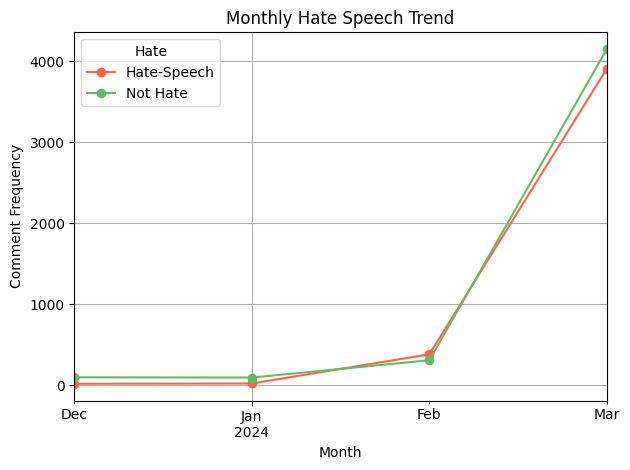

In [65]:
hate_counts.plot(kind='line', marker='o', color=['Tomato', '#66BB66']) 
plt.title('Monthly Hate Speech Trend')
plt.xlabel('Month')
plt.ylabel('Comment Frequency')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Hate')
plt.show()

In [67]:
df_time['month'] = df_time['created_at'].dt.to_period('M')
count = df_time.groupby('month').size()
count

/var/folders/87/7c4rkvps35s3h1x7w31r80s40000gn/T/ipykernel_34496/2548767469.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_time['month'] = df_time['created_at'].dt.to_period('M')


month
2023-12     112
2024-01     113
2024-02     687
2024-03    8063
Freq: M, dtype: int64

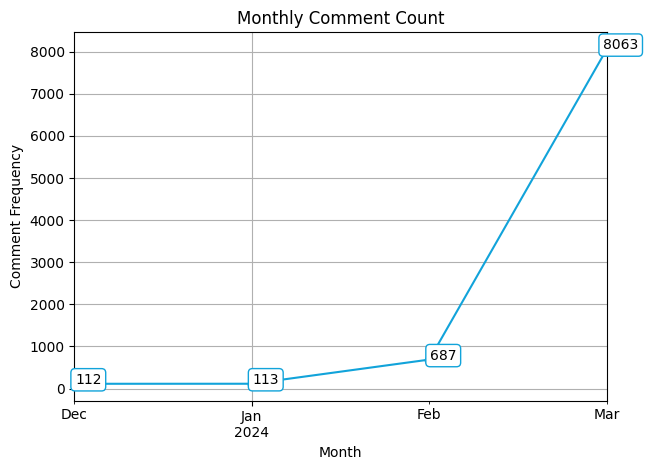

In [77]:
count.plot(kind='line', marker='o', color=['#11a3da']) 
plt.title('Monthly Comment Count')
plt.xlabel('Month')
plt.ylabel('Comment Frequency')
plt.grid(True)
plt.tight_layout()
for x, y in zip(count.index.astype(str), count.values):
    plt.annotate(str(y), xy=(x, y), xytext=(10, 0), textcoords='offset points', ha='center', bbox=dict(boxstyle="round,pad=0.3", edgecolor='#11a3da', facecolor='white'))
plt.show()